In [28]:
model_id = '../../results/models/bert-large-cased-v_0.01'
model_id = '../../results/models/distilbert-base-cased-v_0.01'
#model_id = '../../results/models/bert-large-cased-v_1e-07_decoder-bias'
#model_id = '../../results/models/distilbert-base-cased-v_1e-07_decoder-bias'

In [29]:
from gradiend.model import ModelWithGradiend

model = ModelWithGradiend.from_pretrained(model_id)

In [30]:
important_neurons = {k: v.sum().item() for k, v in model.gradiend.layers.items()}
total_neurons = {k: v.numel() for k, v in model.gradiend.layers.items()}
print(sum(important_neurons.values()))

795864


In [13]:
print(sum(important_neurons.values()))

59370


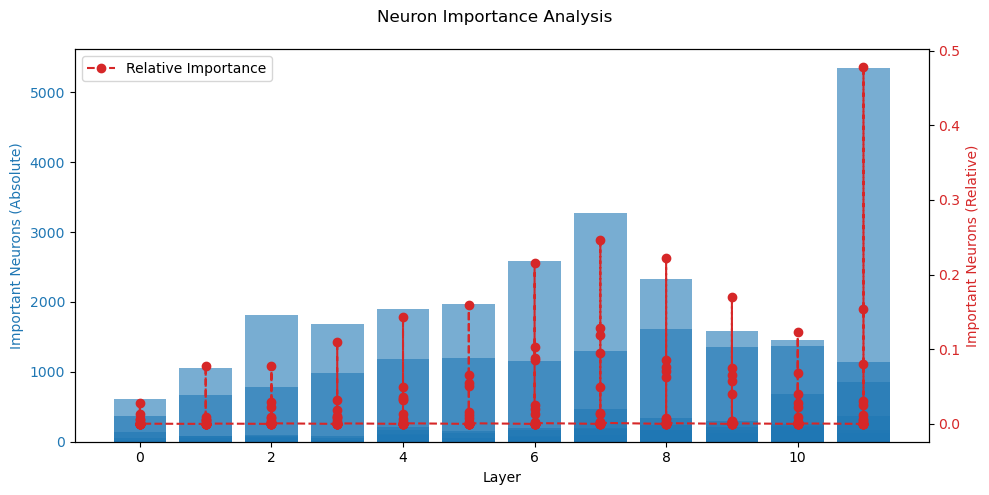

In [18]:
import re
import matplotlib.pyplot as plt

def extract_layer_number(key):
    """Extracts the layer number from a key using regular expressions."""
    match = re.search(r'layer.(\d+)', key)
    return int(match.group(1)) if match else None


def plot_neuron_importance(important_neurons, total_neurons):
    """Plots absolute and relative neuron importance distributions."""
    absolute_values = []
    relative_values = []
    layer_indices = []
    
    for key, important_count in important_neurons.items():
        total_count = total_neurons.get(key)
        if total_count is None:
            print(f"Warning: Missing total neurons for {key}. Skipping.")
            continue  # Skip if total count is missing
        
        layer_num = extract_layer_number(key)
        if layer_num is not None:
            layer_indices.append(layer_num)
            absolute_values.append(important_count)
            relative_values.append(important_count / total_count if total_count > 0 else 0)
    
    if not layer_indices:
        print("Error: No valid layer data available for plotting.")
        return
    
    # Sort by layer index for consistent plotting
    sorted_indices, absolute_values, relative_values = zip(*sorted(zip(layer_indices, absolute_values, relative_values)))
    
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    color = 'tab:blue'
    ax1.set_xlabel('Layer')
    ax1.set_ylabel('Important Neurons (Absolute)', color=color)
    ax1.bar(sorted_indices, absolute_values, color=color, alpha=0.6, label='Absolute Count')
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Important Neurons (Relative)', color=color)
    ax2.plot(sorted_indices, relative_values, color=color, marker='o', linestyle='dashed', label='Relative Importance')
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.suptitle('Neuron Importance Analysis')
    fig.tight_layout()
    plt.legend()
    plt.show()
    

plot_neuron_importance(important_neurons, total_neurons)